<a href="https://colab.research.google.com/github/zrruziev/Machine_Learning_Practice/blob/main/CH_10_Building_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an Image Classifier

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Show versions of tensorflow and keras
print(f'tf = {tf.__version__}')
print(f'keras = {keras.__version__}')

tf = 2.7.0
keras = 2.7.0


Load Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Show the shape and type of training data
print(f'train_data_shape: {X_train_full.shape}')
print(f'train_data_type: {X_train_full.dtype}')

4431872/4422102 [==============================] - 0s 0us/step
train_data_shape: (60000, 28, 28)
train_data_type: uint8


Let's split the full training data set into a validation and a (smaller) training set. Also scale the pixel intensities down to the range of [0:1] by dividing by 255 and convert them to floats(float_num = 255., int_num = 255)

In [ ]:
import numpy as np

# If I don't use "np.float32", dtypes will be float64.  
X_valid, X_train = np.float32(X_train_full[:5000] / 255.), np.float32(X_train_full[5000:] / 255.)
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = np.float32(X_test / 255.)

# Show the scaled and converted data
print(f'X_valid_shape: {X_valid.shape} {X_valid.dtype}\nX_train_shape: {X_train.shape} {X_valid.dtype}\nX_test_shape: {X_test.shape} {X_test.dtype}')

X_valid_shape: (5000, 28, 28) float32
X_train_shape: (55000, 28, 28) float32
X_test_shape: (10000, 28, 28) float32


Let's plot some images

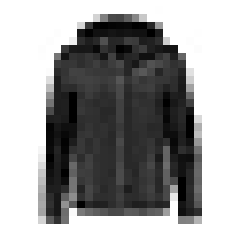

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

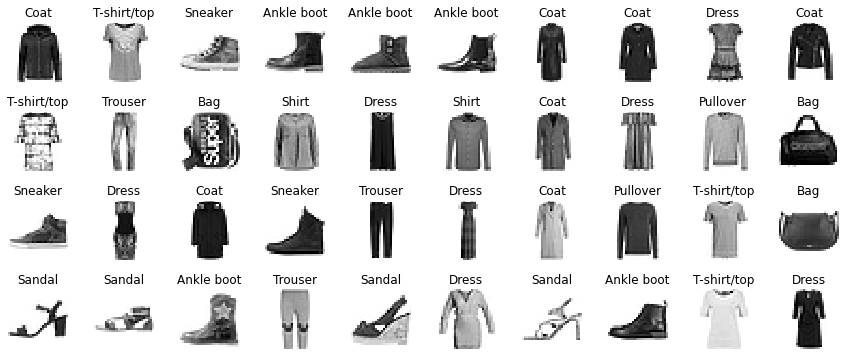

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap='binary', interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=.3, hspace=.5)
plt.show()


_______________________________________________________________
Create a Model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


############# We may write like this: #############
##-----------------------------------------------##
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [ ]:
keras.backend.clear_session() 
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


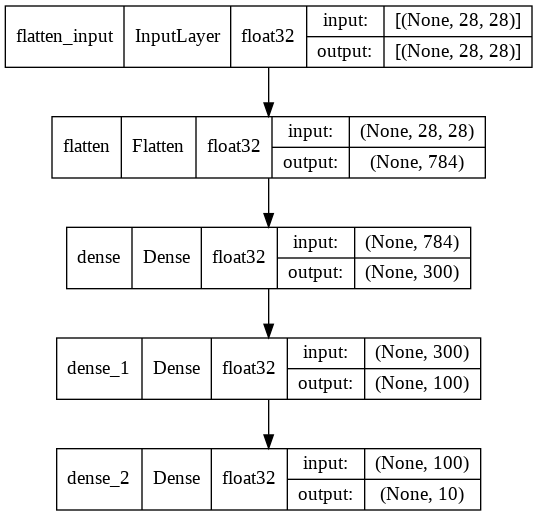

In [ ]:
keras.utils.plot_model(model, "classification_model.png", show_shapes=True, show_dtype=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.07197521, -0.03870127,  0.05023946, ...,  0.06510498,
        -0.05642511, -0.01073641],
       [-0.05223197, -0.04943354,  0.05587764, ..., -0.01928981,
        -0.03636342,  0.03530301],
       [ 0.06598572,  0.00785623, -0.05662647, ..., -0.00100086,
         0.05470523, -0.00080468],
       ...,
       [-0.05677069, -0.0557704 , -0.04549497, ..., -0.0325344 ,
         0.00352219,  0.01187817],
       [-0.06310208,  0.07094184, -0.01065329, ...,  0.03343743,
        -0.02026968, -0.03680253],
       [ 0.00809752,  0.03809218,  0.06735979, ..., -0.0134617 ,
        -0.03606478, -0.03677396]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


############ This equivalent to: ############
# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(),
#               metrics=[keras.metrics.sparse_categorical_accuracy])


Training Process

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

Epoch 1/30
1719/1719 [==============================] - 13s 6ms/step - loss: 0.7194 - accuracy: 0.7648 - val_loss: 0.5167 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4872 - accuracy: 0.8296 - val_loss: 0.4335 - val_accuracy: 0.8548
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4424 - accuracy: 0.8447 - val_loss: 0.5122 - val_accuracy: 0.8114
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4168 - accuracy: 0.8544 - val_loss: 0.3982 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3989 - accuracy: 0.8603 - val_loss: 0.3741 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3799 - accuracy: 0.8675 - val_loss: 0.3712 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3678 - accuracy: 0.8705 - val_loss: 0.3676 - val_accurac

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

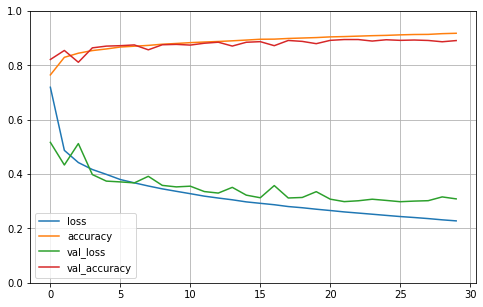

In [ ]:
from IPython.core.pylabtools import figsize
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8783


[0.33862200379371643, 0.8783000111579895]

# Make some predictions

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [ ]:
# y_pred = model.predict_classes(X_new) #DEPRECATED
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
y_pred_percent = model.predict(X_new)
percents = []
for percent in y_pred_percent:
  percent = max(percent)
  a = percent.round(3)
  print(a)
  percents.append(a)
print(percents)

0.976
0.969
1.0
[0.976, 0.969, 1.0]


In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new


array([9, 2, 1], dtype=uint8)

In [ ]:
print(percents)

[0.976, 0.969, 1.0]


# **We should learn why it is happening!...**

In [ ]:
# There is somesthing WIERD Happened!
print(percents[0])
print(f'{percents[0]}')
print("{:.3f}".format(percents[0]))

0.976
0.9760000109672546
0.976


0.976 <class 'numpy.float32'>
0.969 <class 'numpy.float32'>
1.0 <class 'numpy.float32'>


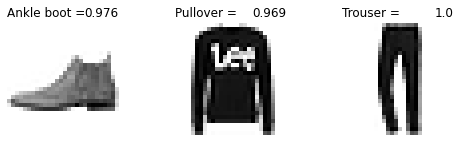

In [ ]:
plt.figure(figsize=(8, 4))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index +1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis('off')
  perc = percents[index]
  print(perc, type(perc))
  text1 = class_names[y_test[index]] + " = "
  plt.title(text1, fontsize=12, loc='left')
  plt.title(perc, loc='right')
plt.subplots_adjust(wspace=.5, hspace=.6)
plt.show()